# Segmenting and Clustering Neighborhoods in Houston

## Table of Contents
1. <a href="#item1"> Read in venues Data/a>
2. <a href="#item2"> Clustering Neighborhood </a>
3. <a href="#item3"> Examine Cluster </a>

<a id ="item1"></a>

##  1. Read in venues data

In [5]:
import pandas as pd
import numpy as np # library to handle data in a vectorized manner

pd.set_option('display.max_columns', 50)
pd.set_option('display.max_rows', 50)

import json # library to handle JSON files

from pandas.io.json import json_normalize # tranform JSON file into a pandas dataframe

# Matplotlib and associated plotting modules
import matplotlib.cm as cm
import matplotlib.colors as colors

# import k-means from clustering stage
from sklearn.cluster import KMeans

#!conda install -c conda-forge folium=0.5.0 --yes # uncomment this line if you haven't completed the Foursquare API lab
import folium # map rendering library

print('Libraries imported.')

Libraries imported.


In [6]:
venues =  pd.read_csv('houston_venuse0317.csv')

In [7]:
venues.head(1)

,Unnamed: 0,Neighbourhood,Neighborhood Latitude,Neighborhood Longitude,Venue,Venue Latitude,Venue Longitude,Venue Category,venue_Super_Category
0,0,Willowbrook,29.660254,-95.456096,Cue's Burgers 'n More,29.668602,-95.462011,Burger Joint,Food Drink


<a id="item2"></a>

## 2. Clustering Neighborhood
This cluster used K-mean clustering algorith and based on frequency of each venue super category in each neighborhood

### 2.1 change category feature into binary value

In [8]:
h_onehot = pd.get_dummies(venues[['venue_Super_Category']], prefix="", prefix_sep="")
# add neighborhood column back to dataframe
h_onehot['Neighbourhood'] = venues['Neighbourhood'] 
# move neighborhood column to the first column
fixed_columns = [h_onehot.columns[-1]] + list(h_onehot.columns[:-1])
h_onehot = h_onehot[fixed_columns]
h_onehot.head(1)

,Neighbourhood,Daily Enssential,Education,Entertainment,Fashion,Food Drink,Indoor Workout,Inner City Transportation,Inter City Transportation,Others,Outdoor Workout
0,Willowbrook,0,0,0,0,1,0,0,0,0,0


In [9]:
h_grouped = h_onehot.groupby('Neighbourhood').mean()
h_grouped.head(1)

,Daily Enssential,Education,Entertainment,Fashion,Food Drink,Indoor Workout,Inner City Transportation,Inter City Transportation,Others,Outdoor Workout
Neighbourhood,,,,,,,,,,
Acres Home,0.04,0.0,0.09,0.0,0.73,0.01,0.02,0.0,0.03,0.08


In [10]:
h_grouped = h_onehot.groupby('Neighbourhood').mean().reset_index()
h_cluster = h_grouped.drop(['Neighbourhood'],axis=1)
h_cluster.shape

(113, 10)

### 2.2 find elbow point for k-mean clustering 

In [14]:
from scipy.spatial.distance import cdist
import matplotlib.pyplot as plt

<function matplotlib.pyplot.show(*args, **kw)>

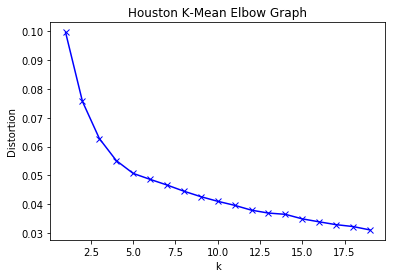

In [16]:
K = range (1,20)
distortion = []
for k in K:
    kmeantest = KMeans(n_clusters=k, random_state=0).fit(h_cluster)
    distortion.append(sum(np.min(cdist(h_cluster,kmeantest.cluster_centers_,'euclidean'),axis = 1))/h_cluster.shape[0])
distortion
plt.plot(K,distortion,'bx-')
plt.xlabel('k')
plt.ylabel('Distortion')
plt.title('Houston K-Mean Elbow Graph')
plt.show

### 2.3 K-mean cluster with chosen cluster number 4

In [17]:
kclusters = 4
# run k-means clustering
kmeans = KMeans(n_clusters=kclusters, random_state=0).fit(h_cluster)
# check cluster labels generated for each row in the dataframe
label = kmeans.labels_


In [18]:
kmeans.cluster_centers_

array([[ 6.88571429e-02,  2.85714286e-04,  7.20000000e-02,
         7.14285714e-03,  7.07142857e-01,  2.68571429e-02,
         2.60000000e-02,  8.57142857e-04,  2.25714286e-02,
         6.82857143e-02],
       [ 1.58188287e-01,  6.77626358e-20,  3.03448276e-02,
         5.05473454e-02,  6.38004926e-01,  4.33087028e-02,
         9.04761905e-03,  2.14285714e-03,  1.73809524e-02,
         5.10344828e-02],
       [ 8.73684211e-02, -2.71050543e-20,  2.00000000e-02,
         2.05263158e-02,  7.93157895e-01,  3.05263158e-02,
         3.15789474e-03,  3.15789474e-03,  1.84210526e-02,
         2.36842105e-02],
       [ 5.41176471e-02, -2.71050543e-20,  1.32941176e-01,
         9.41176471e-03,  6.32352941e-01,  1.58823529e-02,
         2.76470588e-02,  4.33680869e-19,  3.29411765e-02,
         9.47058824e-02]])

In [19]:
h_cluster['Neighbourhood']=h_grouped['Neighbourhood']
h_cluster['label']=label
h_cluster.head(5)

,Daily Enssential,Education,Entertainment,Fashion,Food Drink,Indoor Workout,Inner City Transportation,Inter City Transportation,Others,Outdoor Workout,Neighbourhood,label
0,0.04,0.0,0.09,0.00,0.73,0.01,0.02,0.00,0.03,0.08,Acres Home,0
1,0.14,0.0,0.06,0.05,0.62,0.03,0.00,0.00,0.01,0.09,Addicks,1
2,0.17,0.0,0.02,0.04,0.64,0.02,0.02,0.00,0.03,0.06,Afton Oaks,1
3,0.10,0.0,0.03,0.02,0.81,0.01,0.00,0.00,0.01,0.02,Alief,2
4,0.07,0.0,0.01,0.02,0.79,0.03,0.01,0.01,0.02,0.04,Allendale,2


In [20]:
h_cluster.groupby(['label']).count()

,Daily Enssential,Education,Entertainment,Fashion,Food Drink,Indoor Workout,Inner City Transportation,Inter City Transportation,Others,Outdoor Workout,Neighbourhood
label,,,,,,,,,,,
0,35,35,35,35,35,35,35,35,35,35,35
1,42,42,42,42,42,42,42,42,42,42,42
2,19,19,19,19,19,19,19,19,19,19,19
3,17,17,17,17,17,17,17,17,17,17,17


In [21]:
h_NLL = venues.loc[:,['Neighbourhood','Neighborhood Latitude','Neighborhood Longitude']].drop_duplicates().sort_values('Neighbourhood')
h_NLL = h_NLL.reset_index(drop = True)

In [22]:
h_merged = pd.DataFrame(h_cluster.loc[:,['label','Neighbourhood']])
h_merged.head(5)

,label,Neighbourhood
0,0,Acres Home
1,1,Addicks
2,1,Afton Oaks
3,2,Alief
4,2,Allendale


In [23]:
h_merged['Neighborhood Latitude']=h_NLL.iloc[:,1]
h_merged['Neighborhood Longitude']=h_NLL['Neighborhood Longitude']
h_merged.head(5)

,label,Neighbourhood,Neighborhood Latitude,Neighborhood Longitude
0,0,Acres Home,29.770793,-95.328129
1,1,Addicks,29.782451,-95.642446
2,1,Afton Oaks,29.731500,-95.453725
3,2,Alief,29.711064,-95.596334
4,2,Allendale,29.694118,-95.246324


In [24]:
latitude = h_merged['Neighborhood Latitude'][0]
latitude

29.770792999999998

##  2.4 view clusters in map view

In [43]:
latitude = h_merged['Neighborhood Latitude'][0]
longitude = h_merged['Neighborhood Longitude'][0]
map_clusters = folium.Map(location=[latitude, longitude], zoom_start=11)
# set color scheme for the clusters
x = np.arange(kclusters)
ys = [i + x + (i*x)**2 for i in range(kclusters)]
colors_array = cm.rainbow(np.linspace(0, 1, len(ys)))
rainbow = [colors.rgb2hex(i) for i in colors_array]

# add markers to the map
markers_colors = []
for lat, lon, poi, cluster in zip(h_merged['Neighborhood Latitude'], h_merged['Neighborhood Longitude'], h_merged['Neighbourhood'], h_merged['label']):
    label = folium.Popup(str(poi) + ' Cluster ' + str(cluster), parse_html=True)
    folium.CircleMarker(
        [lat, lon],
        radius=5,
        popup=label,
        color=rainbow[cluster-1],
        fill=True,
        fill_color=rainbow[cluster-1],
        fill_opacity=0.7).add_to(map_clusters)
folium.
       
map_clusters

<a id="item3"></a>

## 3. Examine Clusters

## 3.1 let view what are most populated venue category in those clusters and define cluster properties

In [52]:
def return_most_common_venues(row, num_top_venues):
    row_categories = row.iloc[1:]
    row_categories_sorted = row_categories.sort_values(ascending=False)
    
    return row_categories_sorted.index.values[0:num_top_venues]
num_top_venues =5
indicators = ['st', 'nd', 'rd']
# create columns according to number of top venues
columns = ['Neighbourhood']
for ind in np.arange(num_top_venues):
    try:
        columns.append('{}{} Most Common Venue'.format(ind+1, indicators[ind]))
    except:
        columns.append('{}th Most Common Venue'.format(ind+1))

# create a new dataframe
neighborhoods_venues_sorted = pd.DataFrame(columns=columns)
neighborhoods_venues_sorted['Neighbourhood'] = h_grouped['Neighbourhood']

for ind in np.arange(h_grouped.shape[0]):
    neighborhoods_venues_sorted.iloc[ind, 1:] = return_most_common_venues(h_grouped.iloc[ind, :], num_top_venues)

neighborhoods_venues_sorted.head(2)

,Neighbourhood,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue
0,Acres Home,Food Drink,Entertainment,Outdoor Workout,Daily Enssential,Others
1,Addicks,Food Drink,Daily Enssential,Outdoor Workout,Entertainment,Fashion


In [53]:
h_pp = h_merged.join(neighborhoods_venues_sorted.set_index('Neighbourhood'),on = 'Neighbourhood').drop(['Neighborhood Latitude','Neighborhood Longitude'],1)
h_pp.head(2)

,label,Neighbourhood,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue
0,0,Acres Home,Food Drink,Entertainment,Outdoor Workout,Daily Enssential,Others
1,1,Addicks,Food Drink,Daily Enssential,Outdoor Workout,Entertainment,Fashion


### Most Popular 5 Venues Category in Cluster 0

In [56]:
c_0 = h_pp.loc[h_pp['label']==0]
c_0.head(2)

,label,Neighbourhood,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue
0,0,Acres Home,Food Drink,Entertainment,Outdoor Workout,Daily Enssential,Others
9,0,Brays Oaks,Food Drink,Outdoor Workout,Entertainment,Daily Enssential,Others


### Most Popular 5 Venues Category in Cluster 1

In [207]:
c_1 = h_pp.loc[h_pp['label']==1]
c_1.head(2)

,label,Neighbourhood,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue
1,1,Addicks,Food Drink,Daily Enssential,Outdoor Workout,Entertainment,Fashion
2,1,Afton Oaks,Food Drink,Daily Enssential,Outdoor Workout,Fashion,Others


### Most Popular 5 Venues Category in Cluster 2

In [208]:
c_2 = h_pp.loc[h_pp['label']==2]
c_2.head(2)

,label,Neighbourhood,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue
3,2,Alief,Food Drink,Daily Enssential,Entertainment,Outdoor Workout,Fashion
4,2,Allendale,Food Drink,Daily Enssential,Outdoor Workout,Indoor Workout,Others


### Most Popular 5 Venues Category in Cluster 3

In [209]:
c_3 = h_pp.loc[h_pp['label']==3]
c_3.head(2)

,label,Neighbourhood,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue
5,3,Astrodome Area,Food Drink,Entertainment,Outdoor Workout,Daily Enssential,Inner City Transportation
6,3,Bellfort,Food Drink,Entertainment,Outdoor Workout,Daily Enssential,Inner City Transportation


In [170]:
h_cluster_scp = h_cluster.groupby(['label']).mean()


### 3.2 Let view venues in each supercategory for each cluster

In [25]:
import matplotlib as mpl
import matplotlib.pyplot as plt
%matplotlib inline

In [26]:
h_cluster_scp = h_cluster.groupby(['label']).mean()
h_cluster_scp

,Daily Enssential,Education,Entertainment,Fashion,Food Drink,Indoor Workout,Inner City Transportation,Inter City Transportation,Others,Outdoor Workout
label,,,,,,,,,,
0,0.068857,0.000286,0.072000,0.007143,0.707143,0.026857,0.026000,0.000857,0.022571,0.068286
1,0.158188,0.000000,0.030345,0.050547,0.638005,0.043309,0.009048,0.002143,0.017381,0.051034
2,0.087368,0.000000,0.020000,0.020526,0.793158,0.030526,0.003158,0.003158,0.018421,0.023684
3,0.054118,0.000000,0.132941,0.009412,0.632353,0.015882,0.027647,0.000000,0.032941,0.094706


In [27]:
h_cluster_scp = h_cluster_scp.reset_index()

In [43]:
lables_pie =h_cluster_scp.drop(['label'],1).columns

Text(0.5, 0.98, 'Houston Neighborhood Clusters')

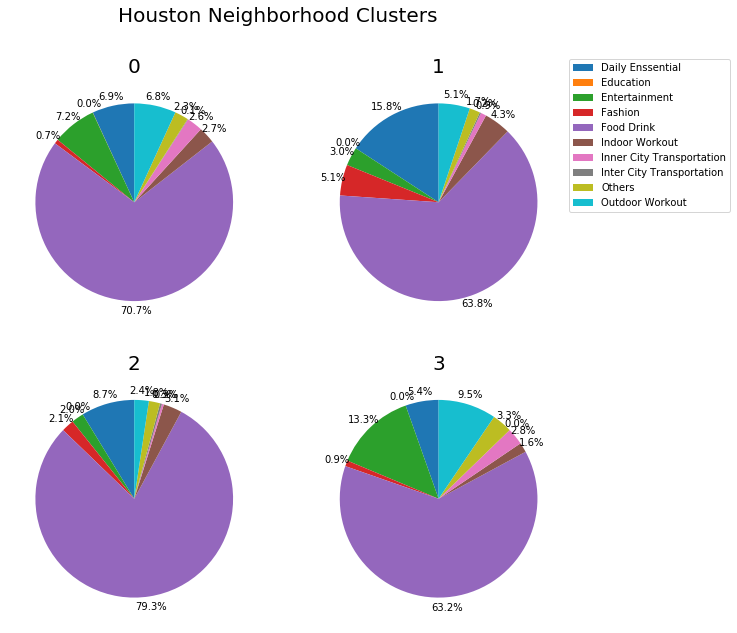

In [53]:
fig,axes = plt.subplots(2,2,figsize=(10,10))
for i, (idx,row) in enumerate(h_cluster_scp.set_index('label').iterrows()):
    
    ax = axes[i//2,i%2]
    #row = row[row.gt(row.sum()*.01)]
    ax.pie(row,labels=None,startangle=90,autopct = '%1.1f%%',pctdistance = 1.1)
    ax.set_title(idx,fontsize=20)
ax.legend(labels= lables_pie,loc = 'upper right',bbox_to_anchor = (1.7,2.3))
fig.suptitle('Houston Neighborhood Clusters',fontsize =20)



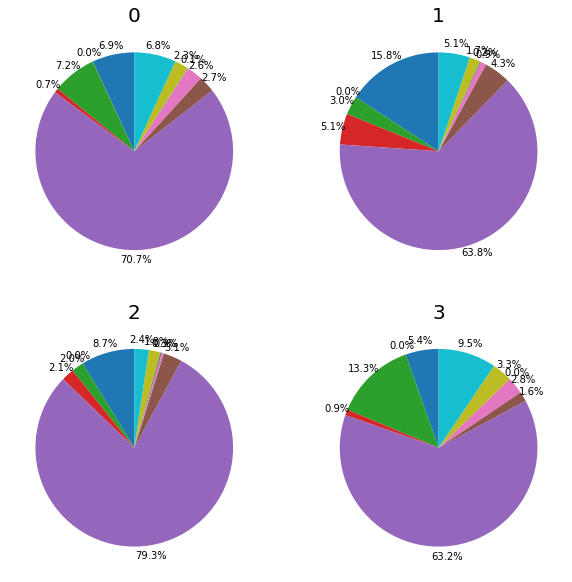

In [32]:
fig,axes = plt.subplots(2,2,figsize=(10,10))
for i, (idx,row) in enumerate(h_cluster_scp.set_index('label').iterrows()):
    
    ax = axes[i//2,i%2]
    #row = row[row.gt(row.sum()*.01)]
    ax.pie(row,labels=None,startangle=90,autopct = '%1.1f%%',pctdistance = 1.1)
    ax.set_title(idx,fontsize=20)
ax.axis('equal')
ax.legend(labels=c_pie.index,loc = 'upper right',bbox_to_anchor = (1.7,1))
